<table align="left">
  <td>
    <a href="https://is.gd/S6BBIV" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Introducción **Clustering - K-MEANS**

Proceso por el cual se agrupan entidades similares. El objetivo de esta técnica de aprendizaje automático no supervisado es encontrar similitudes entre puntos de datos y agrupar puntos de datos similares.

Ref: [Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow](https://https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

## K-Means

Iniciamos generando datos en forma de Blobs.

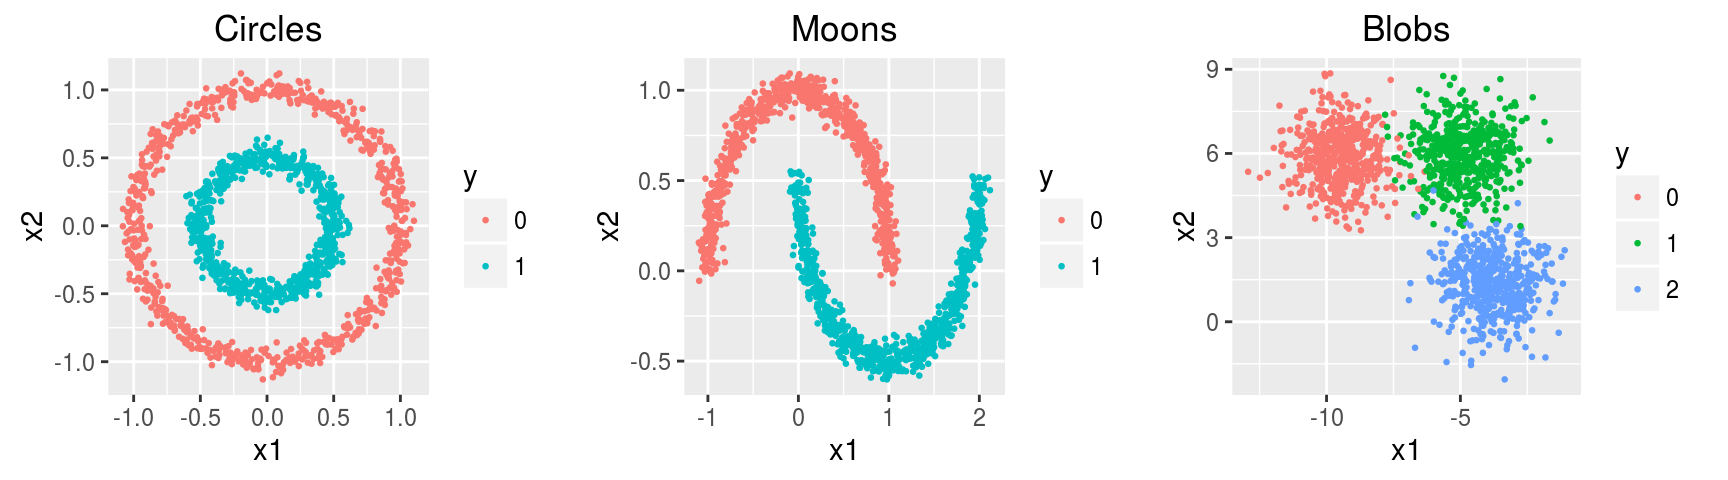

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


from sklearn.datasets import make_blobs

In [2]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [3]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

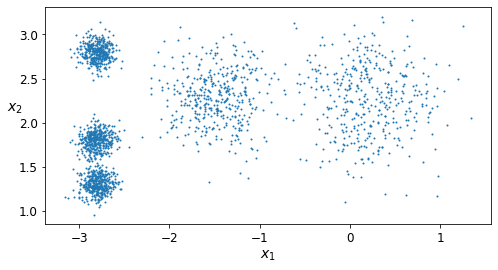

In [5]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### Paso 2. Entrenar y Predecir

Se entrena el algoritmo K-Means utilizando los datos generados para tratar de encontrar los centroides. 

In [6]:
from sklearn.cluster import KMeans

In [7]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

**Predicciones**: Cada instancia se ha asignada a uno de los 5 grupos, en el caso de un entrenamiento no supervisado las predicciones están asociadas al número de cluster con el cual se asoció cada uno de los datos. 

In [8]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

Centroides determinados por el algoritmo:

In [9]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Predicciones de nuevas instancias:


In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

### Paso 3. Visualización de las fronteras de decisión

In [11]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

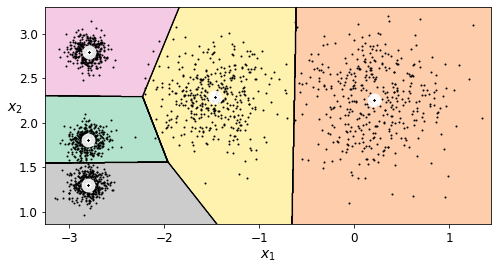

In [12]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

## Funcionamiento Algoritmo K-Means

1. Primero se inicializan $k$ centroides al azar: se eligen $k$ instancias distintas al azar del conjunto de datos y se colocan los centroides en sus ubicaciones.
2. Se repite hasta la convergencia (es decir, hasta que los centroides dejen de moverse):
    - Asignar cada instancia al centroide más cercano.
    - Actualizar los centroides para que sean la media de las instancias asignadas a ellos.

La clase `KMeans` aplica un algoritmo optimizado por defecto. Para obtener el algoritmo original de K-Means (sólo con fines educativos), debe establecer `init="random"`, `n_init=1` y `algorithm="full"`.

Vamos a ejecutar el algoritmo K-Means para 1, 2 y 3 iteraciones, para ver 

cómo se mueven los centroides:

In [14]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

### Visualización de los resultados

- En la parte superior izquierda de la grafica se se observan los centroides inicializados aleatoriamente. 
- En la parte superior derecha se etiquetan las instancias. 
- En la parte central izquierda se actualizan los centroides
- En la parte central derecha se vuelven a etiquetar las instancias. 

En solo tres iteraciones el algoritmo ha llegado a una agrupación que parece estar cercana de ser óptima.

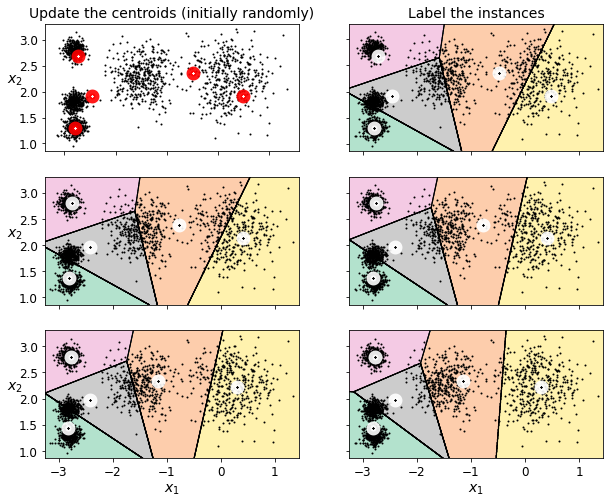

In [15]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### Evaluación del rendimiento por **Inercia**

Para seleccionar el mejor modelo, necesitaremos una forma de evaluar el rendimiento de un modelo K-Mean. Desgraciadamente, el clustering es una tarea no supervisada, por lo que no tenemos los objetivos. Pero al menos podemos medir la distancia entre cada instancia y su centroide. Esta es la idea detrás de la métrica de inercia:

In [16]:
kmeans.inertia_

211.5985372581684

Como se puede comprobar fácilmente, la inercia es la suma de las distancias al cuadrado entre cada instancia de entrenamiento y su centroide más cercano:

In [19]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816868

El método score() devuelve la inercia negativa. ¿Por qué negativa? Pues porque el método score() de un predictor debe respetar siempre la regla "cuanto más grande, mejor".
Las puntuaciones malas devolverán un número negativo grande, mientras que las buenas puntuaciones devuelven cerca de cero. Generalmente, querrá tomar el valor absoluto de la salida del método de las puntuaciones para una mejor visualización.

In [20]:
kmeans.score(X)

-211.59853725816836

### Incilización de centroides mejorada

En el algoritmo original de K-Means, los centroides se inicializan aleatoriamente y el algoritmo simplemente ejecuta una única iteración para mejorar gradualmente los centroides, como hemos visto anteriormente.

Sin embargo, un problema importante de este enfoque es que si se ejecuta K-Means varias veces (o con diferentes semillas aleatorias), puede converger a soluciones muy diferentes, como se puede ver a continuación:


In [21]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

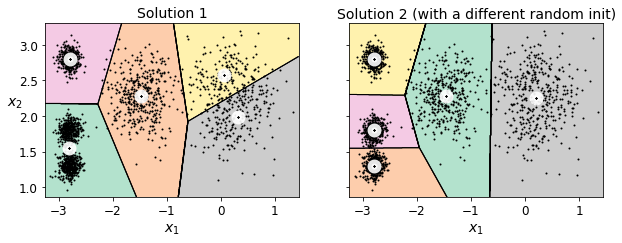

In [22]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

## Inicializaciones Multiples

un enfoque para resolver el problema de la variabilidad es simplemente ejecutar el algoritmo K-Means varias veces con diferentes inicializaciones aleatorias, y seleccionar la solución que minimiza la inercia. Por ejemplo, aquí están las inercias de los dos modelos "malos" mostrados en la figura anterior:


In [23]:
kmeans_rnd_init1.inertia_

219.43539442771396

In [24]:
kmeans_rnd_init2.inertia_

211.5985372581684

Como puedes ver, tienen una inercia más alta que el primer modelo "bueno" que entrenamos, lo que significa que probablemente sean peores.

Cuando se establece el hiperparámetro `n_init`, Scikit-Learn ejecuta el algoritmo original `n_init` veces, y selecciona la solución que minimiza la inercia. Por defecto, Scikit-Learn establece `n_init=10`.

In [25]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

Como se puede ver, terminamos con el modelo inicial, que es ciertamente la solución óptima de K-Means (al menos en términos de inercia, y asumiendo k=5 ).

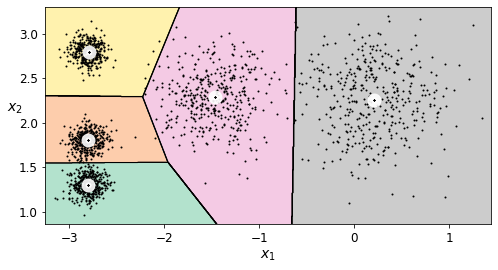

In [26]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [27]:
kmeans_rnd_10_inits.inertia_

211.5985372581684

### Metodos de inicialización del centroide

En lugar de inicializar los centroides de forma totalmente aleatoria, es preferible inicializarlos utilizando el siguiente algoritmo, propuesto en un [documento de 2006](https://goo.gl/eNUPw6) por David Arthur y Sergei Vassilvitskii:
* Tomar un centroide $c_1$, elegido uniformemente al azar del conjunto de datos.

* Tomar un nuevo centro $c_i$, eligiendo una instancia $\mathbf{x}_i$ con la probabilidad: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ es la distancia entre la instancia $\mathbf{x}_i$ y el centroide más cercano que ya fue elegido. Esta distribución de probabilidad garantiza que las instancias más alejadas de los centroides ya elegidos tengan muchas más probabilidades de ser seleccionadas como centroides.

* Repetir el paso anterior hasta que se hayan elegido todos los $k$ centroides.



El resto del algoritmo K-Means++ es simplemente un K-Means normal. Con esta inicialización, es mucho menos probable que el algoritmo K-Means converja a una solución subóptima, por lo que es posible reducir `n_init` considerablemente. La mayoría de las veces, esto compensa en gran medida la complejidad adicional del proceso de inicialización.

Para establecer la inicialización a K-Means++, simplemente establezca `init="k-means++"` (en realidad es el valor por defecto):

In [28]:
KMeans()

KMeans()

In [29]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### Enncontrando el número de centroides adecuado

¿Qué pasa si el número de clusters se establece en un valor inferior o superior a 5?

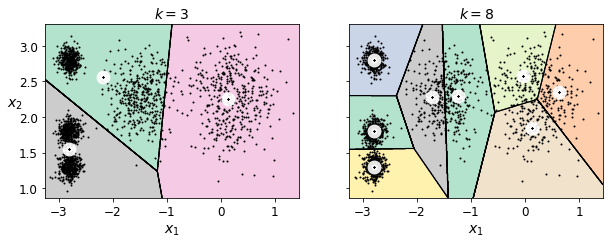

In [45]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Estos dos modelos no se ven muy bien. ¿Qué pasa con sus inercias?

In [44]:
kmeans_k3.inertia_

261.7967778569468

In [40]:
kmeans_k8.inertia_

119.11983416102879

No, no podemos simplemente tomar el valor de k que minimiza la inercia, ya que ésta sigue siendo menor a medida que aumentamos k . En efecto, cuantos más clusters haya, más cerca estará cada instancia de su centroide más cercano y, por tanto, menor será la inercia. Sin embargo, podemos representar la inercia en función de k y analizar la curva resultante:

In [41]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

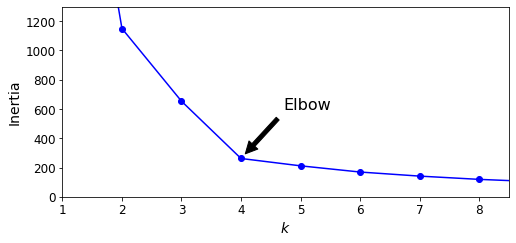

In [42]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

Como se puede ver, hay un codo en $k=4$, lo que significa que menos clusters que eso sería malo, y más clusters no ayudarían mucho y podrían cortar los clusters a la mitad. Así que $k=4$ es una opción bastante buena. Por supuesto, en este ejemplo no es perfecto, ya que significa que las dos manchas de la parte inferior izquierda se considerarán como un solo clúster, pero, no obstante, es una agrupación bastante buena.

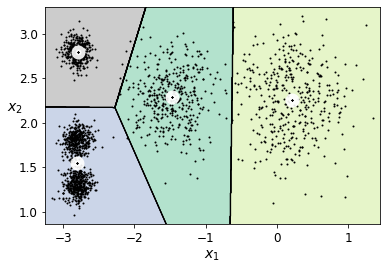

In [46]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

### Silhouette Score

Otro enfoque es observar la _puntuación de silueta_, que es el _coeficiente de silueta_ medio de todas las instancias. 

El coeficiente de silueta de una instancia es igual a $(b - a)/\max(a, b)$ donde $a$ es la distancia media a las otras instancias del mismo cluster (es la _distancia media intra-cluster_), y $b$ es la _distancia media al cluster más cercano_, es decir, la distancia media a las instancias del siguiente cluster más cercano (definido como el que minimiza $b$, excluyendo el propio cluster de la instancia). 

El coeficiente de silueta puede variar entre -1 y +1: un coeficiente cercano a +1 significa que la instancia está bien dentro de su propio cluster y lejos de otros clusters, mientras que un coeficiente cercano a 0 significa que está cerca del límite de un cluster, y finalmente un coeficiente cercano a -1 significa que la instancia puede haber sido asignada al cluster equivocado.

Explicación detallada: [Silhouette Score for clustering Explained](https://www.youtube.com/watch?v=_jg1UFoef1c) 


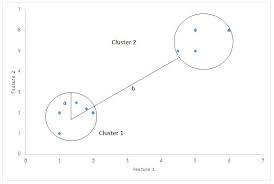

Vamos a trazar la puntuación de la silueta en función de $k$:

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [49]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

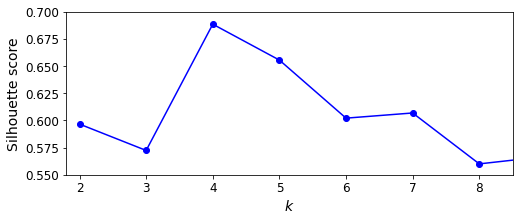

In [50]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

Como puede ver, esta visualización es mucho más rica que la anterior: en particular, aunque confirma que k=4 es una muy buena elección, también subraya el hecho de que k=5 es bastante bueno también.

Una visualización aún más informativa se da cuando se traza el coeficiente de silueta de cada instancia, ordenado por el clúster al que están asignados y por el valor del coeficiente. Esto se denomina diagrama de siluetas:

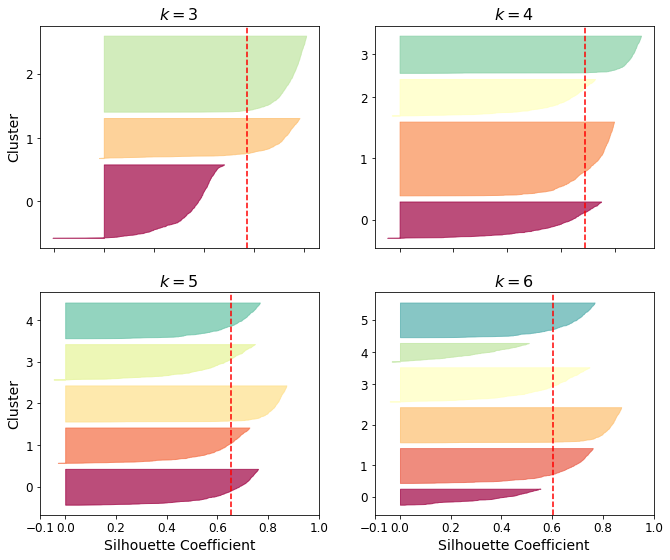

In [51]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Como puede ver, $k=5$ parece la mejor opción en este caso, ya que todos los clusters tienen aproximadamente el mismo tamaño, y todos cruzan la línea de puntos, que representa la puntuación media de la silueta.